In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data_set/sonar_data.data', header=None)

In [3]:
df.columns = ['feature0','feature1','feature02','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10',
              'feature11','feature12','feature13','feature14','feature15','feature16','feature17','feature18','feature19','feature20',
              'feature21','feature22','feature23','feature24','feature25','feature26','feature27','feature28','feature29','feature30'
             ,'feature31','feature32','feature33','feature34','feature35','feature36','feature37','feature38','feature39','feature40'
             ,'feature41','feature42','feature43','feature44','feature45','feature46','feature47','feature48','feature49','feature50'
             ,'feature51','feature52','feature53','feature54','feature55','feature56','feature57','feature58','feature59','class']

In [4]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
X = df.iloc[:, 0:60].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [6]:
import numpy as np
cov_mat_ = np.cov(X_train_std)
cov_mat = np.cov(X_train_std.T)

In [7]:
cov_mat.shape

(60, 60)

In [8]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [9]:
eigen_vals.shape
eigen_vals

array([1.31866902e+01, 1.11027663e+01, 4.94073126e+00, 3.20543463e+00,
       2.95152915e+00, 2.40743776e+00, 2.21897831e+00, 1.68571833e+00,
       1.57812055e+00, 1.35430849e+00, 1.28202768e+00, 1.14388332e+00,
       1.04077796e+00, 9.60721113e-01, 8.33430595e-01, 7.96101547e-01,
       7.83342700e-01, 6.93603106e-01, 6.67953468e-01, 6.38501279e-01,
       6.18326699e-01, 5.31203793e-01, 5.04167425e-01, 4.77811241e-01,
       4.57619428e-01, 4.14314854e-01, 3.76691800e-01, 3.46617542e-01,
       3.39166310e-01, 3.00978178e-01, 2.90771487e-01, 2.51089314e-01,
       2.32783804e-01, 1.97776108e-01, 1.81763526e-01, 1.65756563e-01,
       1.48643466e-01, 1.27910272e-01, 1.18143151e-01, 1.10776779e-01,
       9.80204992e-02, 8.88491895e-02, 7.10862229e-02, 6.23212488e-02,
       5.65768812e-02, 4.80828486e-02, 4.79451199e-03, 4.15706297e-02,
       3.77315979e-02, 7.74260979e-03, 8.79824936e-03, 1.14828554e-02,
       1.44748946e-02, 1.67479393e-02, 3.14827223e-02, 2.01419787e-02,
      

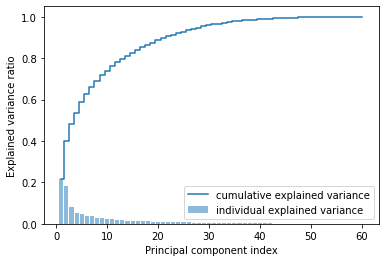

In [10]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,61), var_exp, alpha=0.5, align='center',
label='individual explained variance')
plt.step(range(1,61), cum_var_exp, where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.12654467 -0.11333177]
 [-0.14385366 -0.11935218]
 [-0.12052598 -0.13572286]
 [-0.09886955 -0.17464577]
 [-0.03780587 -0.17129552]
 [-0.05080003 -0.15030954]
 [-0.0530062  -0.14815749]
 [-0.10841876 -0.14909731]
 [-0.09311071 -0.12974238]
 [-0.07839132 -0.12260793]
 [-0.05176591 -0.15517773]
 [-0.02626212 -0.12539484]
 [-0.011768   -0.17381617]
 [ 0.00136664 -0.22915186]
 [ 0.00842869 -0.2403556 ]
 [ 0.02362156 -0.23961617]
 [ 0.05640431 -0.21635188]
 [ 0.09319494 -0.2051498 ]
 [ 0.09793054 -0.20347382]
 [ 0.078242   -0.20256136]
 [ 0.0816013  -0.18142959]
 [ 0.1311497  -0.11837937]
 [ 0.1514228  -0.03515214]
 [ 0.15114727  0.02808466]
 [ 0.15237863  0.07720551]
 [ 0.14631599  0.10468134]
 [ 0.13074515  0.13194952]
 [ 0.05747181  0.16373819]
 [ 0.00571276  0.17962124]
 [-0.06602327  0.17667024]
 [-0.08615663  0.17796126]
 [-0.1108535   0.16866462]
 [-0.12683931  0.15623236]
 [-0.14637673  0.12540242]
 [-0.1606291   0.09715664]
 [-0.1609176   0.07586423]
 [-0.15064732  0.

In [12]:
X_train_std[0].dot(w)

array([-5.82194977,  5.34762023])

In [13]:
X_train_pca = X_train_std.dot(w)

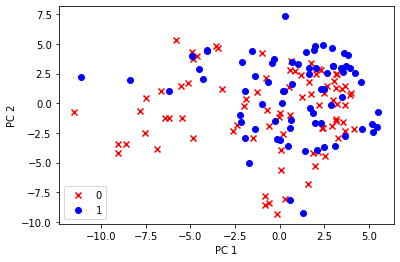

In [14]:
colors = ['r', 'b']
markers = ['x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [15]:
    
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

print('Training accuracy:', lr.score(X_train_pca, y_train))
print('Test accuracy:', lr.score(X_test_pca, y_test))

Training accuracy: 0.8205128205128205
Test accuracy: 0.6538461538461539


In [16]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=100, random_state=1)##linear
svm.fit(X_train_pca, y_train)

print('Training accuracy:', svm.score(X_train_pca, y_train))
print('Test accuracy:', svm.score(X_test_pca, y_test))

Training accuracy: 0.9038461538461539
Test accuracy: 0.7307692307692307


In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
tree.fit(X_train_pca, y_train)

print('Training accuracy:', tree.score(X_train_pca, y_train))
print('Test accuracy:', tree.score(X_test_pca, y_test))

Training accuracy: 0.9102564102564102
Test accuracy: 0.7115384615384616


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_pca, y_train)

print('Training accuracy:', knn.score(X_train_pca, y_train))
print('Test accuracy:', knn.score(X_test_pca, y_test))

Training accuracy: 0.8717948717948718
Test accuracy: 0.6923076923076923


FROM THE ACCURACY SCORES SO FAR, IT APPEARS APPLYING PRINCIPAL COMPONENETS ANALYSIS ON OUR DATA DOSE NOT REALLY HELP IMPROVE PERFORMANCE OF THE CLASSIFIERS.

In [24]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3,kernel='rbf', gamma=15)

X_train_kpca = kpca.fit_transform(X_train_std)
X_test_kpca = kpca.transform(X_test_std)

In [22]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train_kpca, y_train)

print('Training accuracy:', lr1.score(X_train_kpca, y_train))
print('Test accuracy:', lr1.score(X_test_kpca, y_test))

Training accuracy: 0.532051282051282
Test accuracy: 0.5384615384615384


In [26]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf', C=100, random_state=1)##linear
svm1.fit(X_train_kpca, y_train)

print('Training accuracy:', svm1.score(X_train_kpca, y_train))
print('Test accuracy:', svm1.score(X_test_kpca, y_test))

Training accuracy: 0.5961538461538461
Test accuracy: 0.5384615384615384


In [1]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda = LDA()
#X_train_lda = lda.fit_transform(X_train_std, y_train)

In [42]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#knn.fit(X_train_lda, y_train)

#print('Training accuracy:', knn.score(X_train_lda, y_train))
#print('Test accuracy:', knn.score(X_test_lda, y_test))

In [43]:
#from sklearn.tree import DecisionTreeClassifier
#tree2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
#tree2.fit(X_train_lda, y_train)

#print('Training accuracy:', tree2.score(X_train_lda, y_train))
#print('Test accuracy:', tree2.score(X_test_lda, y_test))

In [44]:
#from sklearn.svm import SVC
#svm2 = SVC(kernel='rbf', C=10, random_state=1)##linear
#svm2.fit(X_train_lda, y_train)

#print('Training accuracy:', svm2.score(X_train_lda, y_train))
#print('Test accuracy:', svm2.score(X_test_lda, y_test))